In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Attacker Accuracy vs Global ellison

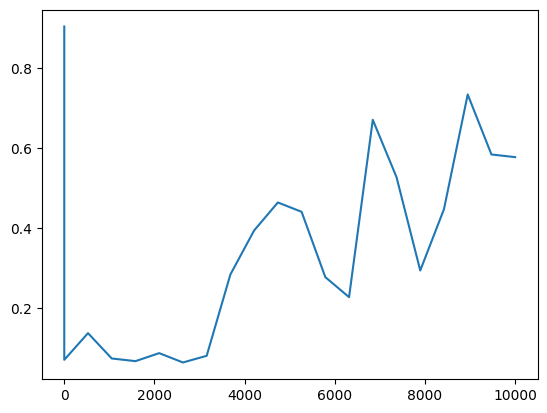

In [11]:
data_dir = '/home/ubuntu/results/global_epsilon_VS_attacker_accuracy_(2023-02-01_23-45)/results.pkl'
data = pickle.load(open(data_dir, 'rb'))
plt.plot(data['global_epsilon'], data['attacker_accuracy'])

dict_keys(['global_epsilon', 'average_aggregated_overhead', 'average_norm_distance', 'average_wasserstein_distance'])


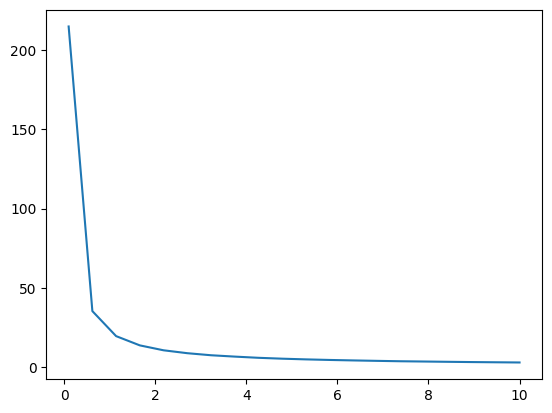

In [9]:
data_dir = '/home/ubuntu/results/global_epsilon_VS_overhead_(2023-02-01_21-44)/results.pkl'
data = pickle.load(open(data_dir, 'rb'))
print(data.keys())
plt.plot(data['global_epsilon'], data['average_norm_distance'])

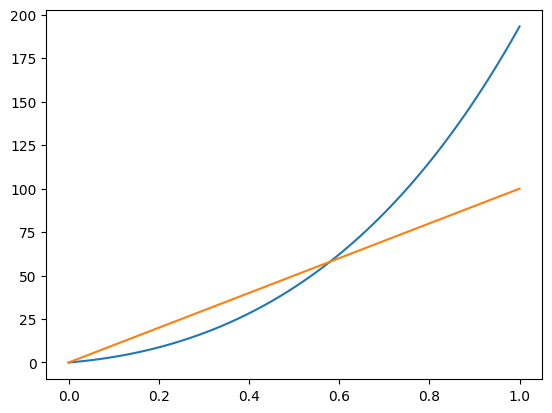

In [14]:
def basic_composition(epsilon, k): 
  return epsilon*k
def advanced_composition(epsilon, delta, k): 
  return np.sqrt(2*k*np.log(1/(delta))) * epsilon + (k * epsilon)*(np.exp(epsilon)-1)

epsilons = np.linspace(0, 1, 100)
adv = [advanced_composition(epsilon, 0.1, 100) for epsilon in epsilons]
bsc = [basic_composition(epsilon, 100) for epsilon in epsilons]
plt.plot(epsilons, adv)
plt.plot(epsilons, bsc)

[0.045, 0.04, 0.06, 0.03]


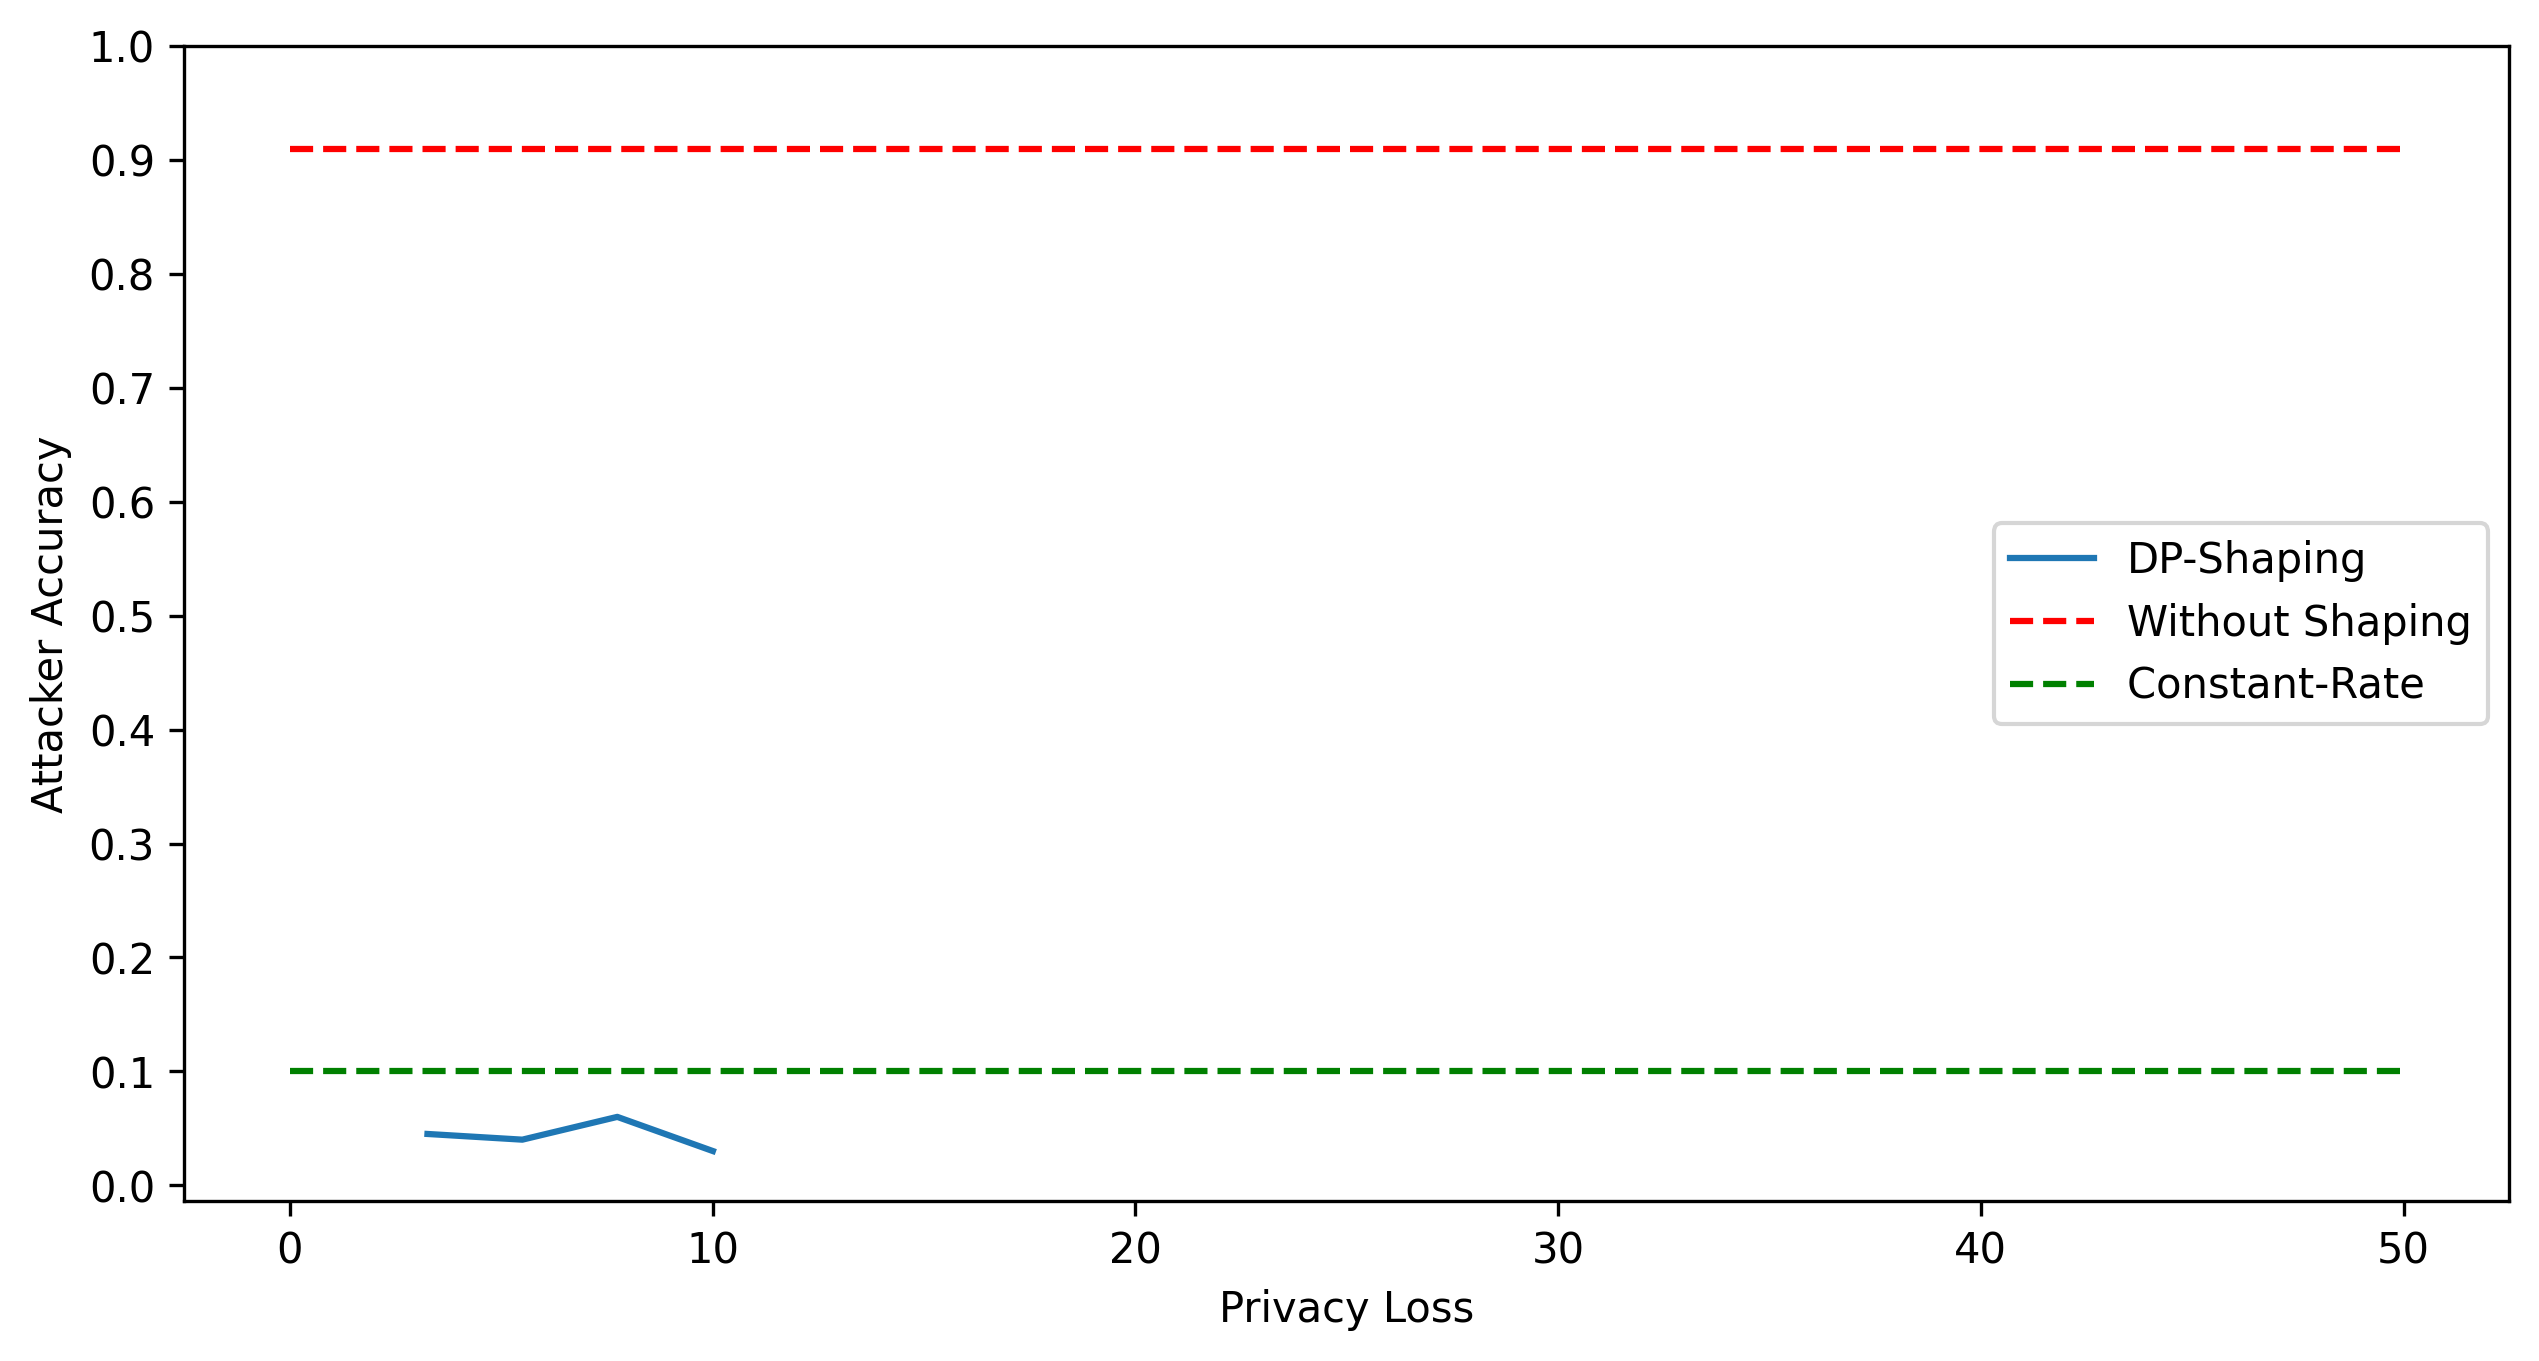

In [5]:
data_dir = '/home/ubuntu/results/privacy_loss_vs_attacker_accuracy_(2023-03-03_01-52)/results.pkl'
plt.figure(dpi=300, figsize=(10,5))
data = pickle.load(open(data_dir, 'rb'))
acc = data['attacker_accuracy'][1:]
print(acc)
privacy_loss = data['privacy_loss'][1:]

plt.plot(privacy_loss,acc, label='DP-Shaping')

plt.plot([0, 50], [0.91, 0.91], 'r--', label='Without Shaping')
plt.plot([0, 50], [0.10, 0.10], 'g--', label='Constant-Rate ')
plt.xticks([0] + list(np.arange(10, 50+1, 10.0)))
plt.yticks([0] + list(np.arange(0.1, 1.0+0.1, 0.1)))
plt.xlabel('Privacy Loss')
plt.ylabel('Attacker Accuracy')
plt.legend()

[25.985706196344502]


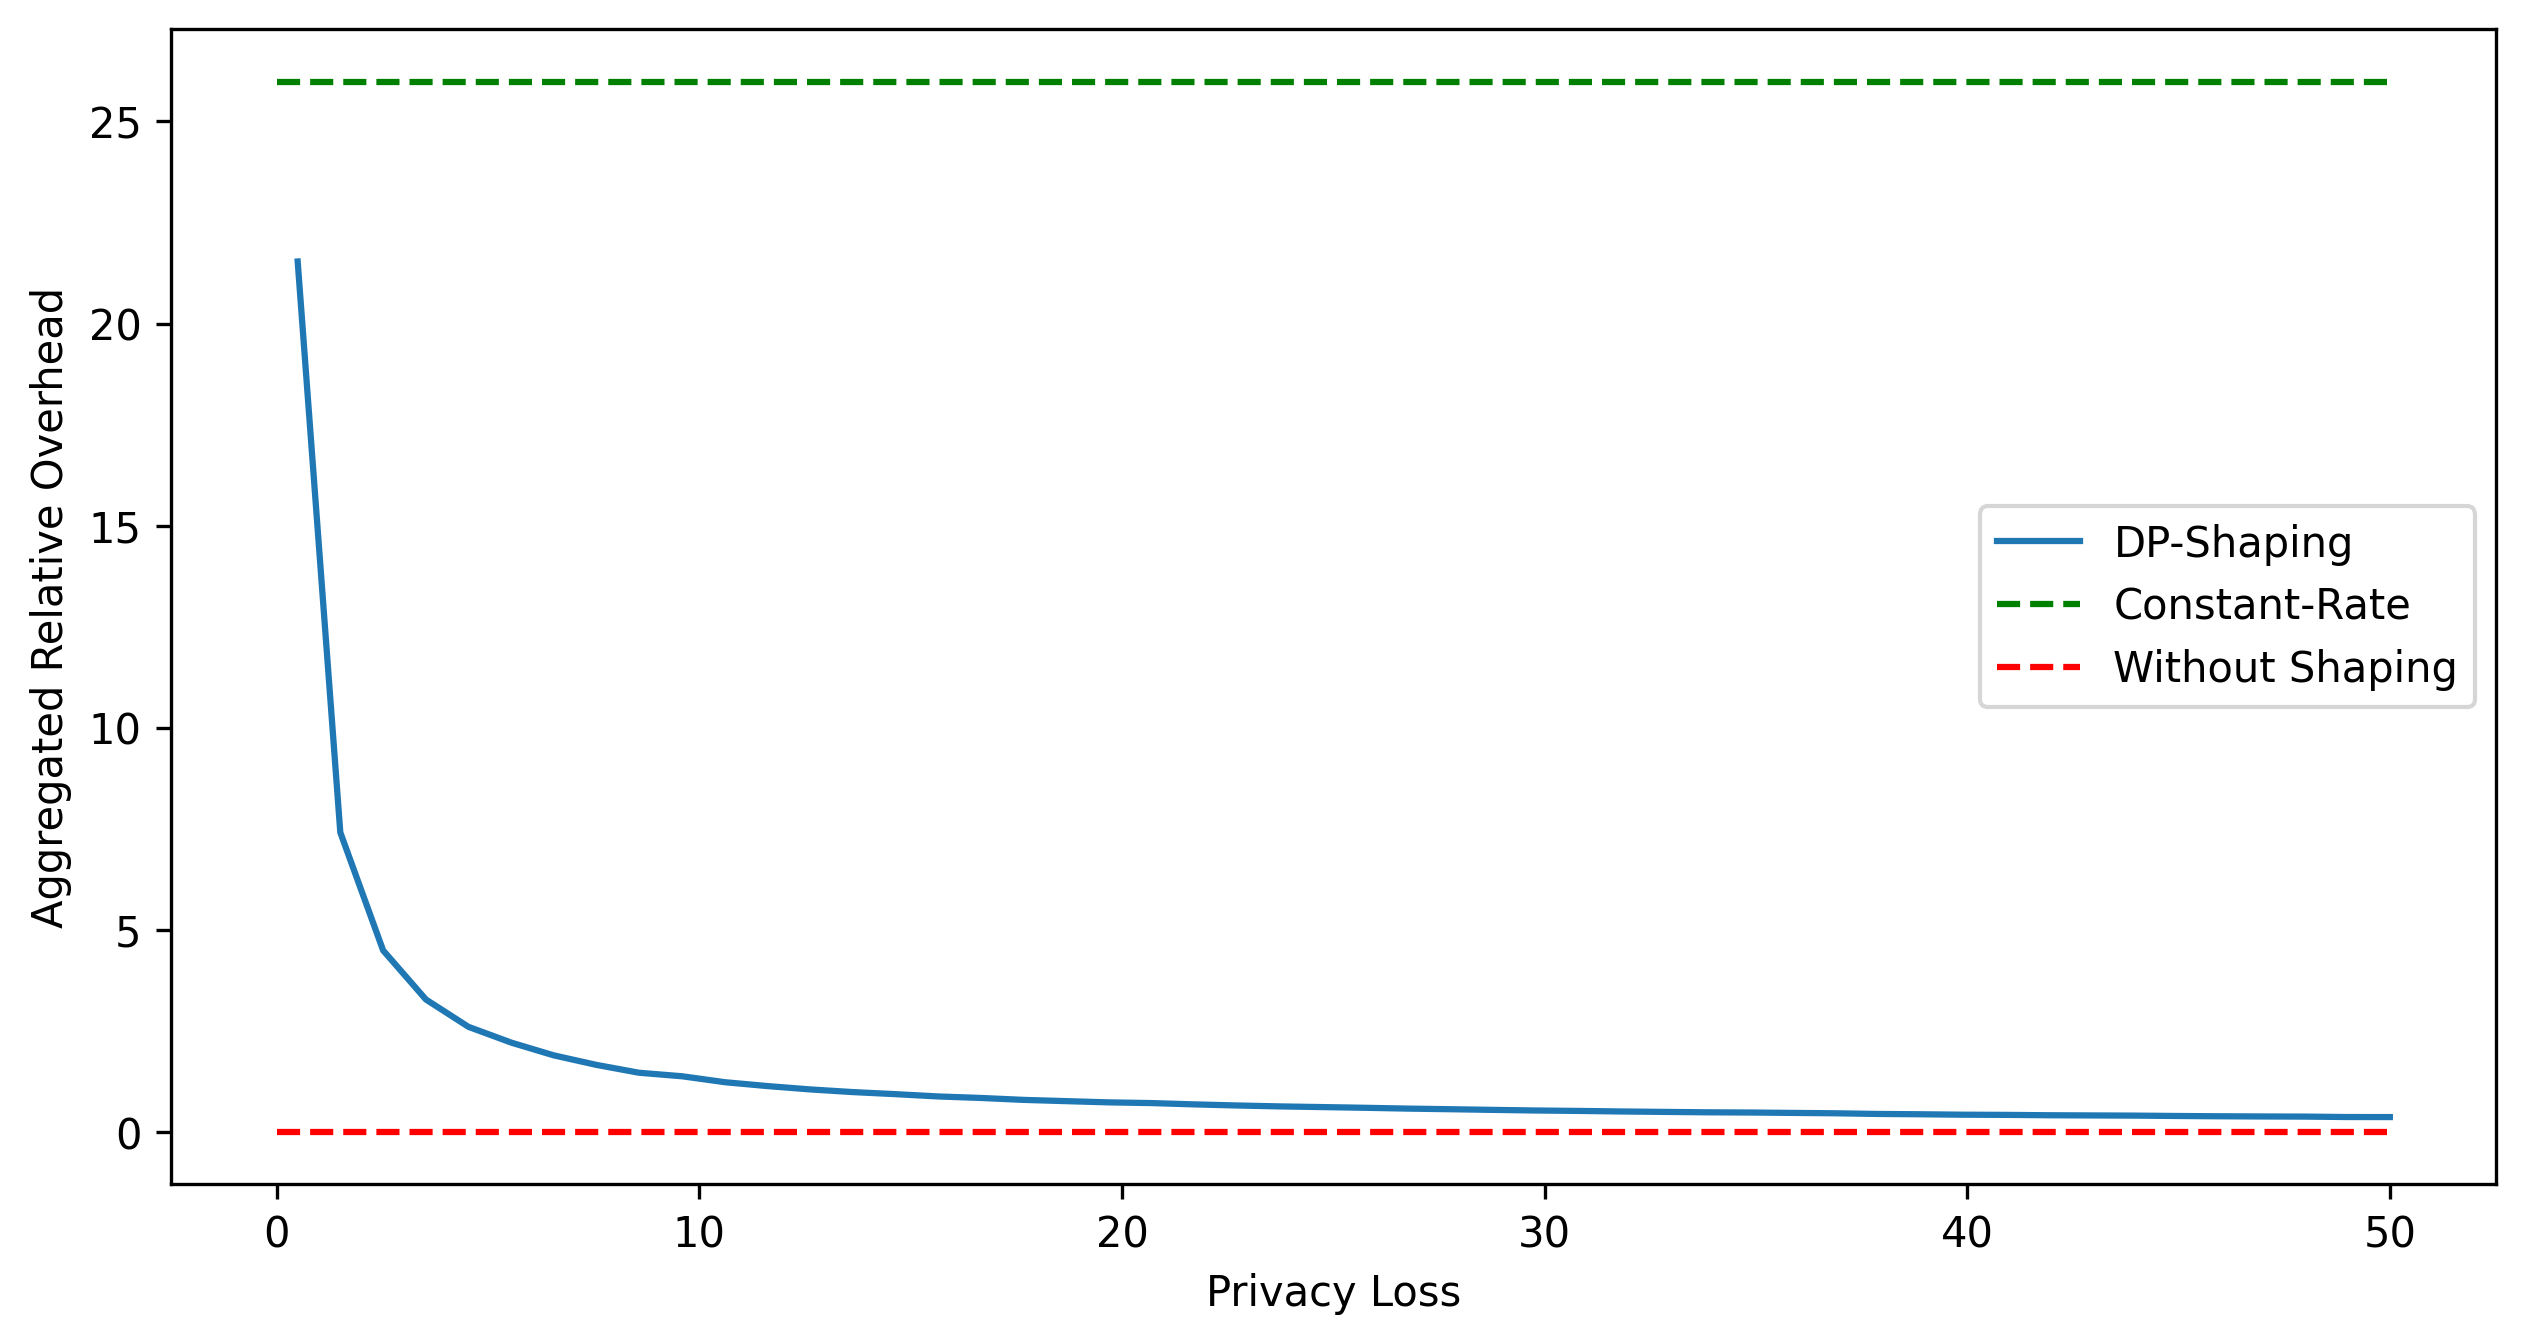

In [14]:
results_dir = '/home/ubuntu/results/privacy_loss_vs_overhead_(2023-03-14_17-28)/results.pkl'
baseline_results_dir = '/home/ubuntu/results/privacy_loss_vs_overhead_(2023-03-14_17-09)/baseline_results.pkl'

results = pickle.load(open(results_dir, 'rb'))
baseline_results = pickle.load(open(baseline_results_dir, 'rb'))


# print(data['average_aggregated_overhead'])
aao = results['average_aggregated_overhead']
ano = results['average_norm_distance']
awd = results['average_wasserstein_distance']
privacy_loss = results['privacy_loss']

baseline_aao = baseline_results['average_aggregated_overhead']
print(baseline_aao)
plt.figure(dpi=300, figsize=(10,5))
plt.plot(privacy_loss,aao, label='DP-Shaping')
plt.plot([0, 50], [baseline_aao, baseline_aao], 'g--', label='Constant-Rate')
plt.plot([0, 50], [0, 0], 'r--', label='Without Shaping')
# plt.xticks([0] + list(np.arange(10, 100+1, 10.0)))
# plt.yticks(list(np.arange(0, 23, 2)) + [24.88])
plt.xlabel('Privacy Loss')
plt.ylabel('Aggregated Relative Overhead')
plt.legend()

[443.68078049571835, 76.12877192171312, 43.36956997370906, 31.46737692795312, 24.78577810789401, 20.79789190657566, 17.900280404242846, 15.887550051130368, 14.254207952398309, 12.915190697839698, 11.793681321347005, 11.121910977008605, 10.405625796040997, 9.747728401750312, 9.250339211380375, 8.757968313732956, 8.555030577375797, 8.078267492546551, 7.665119021677536, 7.475454057843562, 7.141165300700685, 6.878284191722167, 6.8012946054046335, 6.49953646364081, 6.303851050516392, 6.166234748647189, 5.9739450634777596, 5.753980252063413, 5.719959117620449, 5.558527334302732, 5.387114243118509, 5.365785474687931, 5.19266128892851, 5.044693156773268, 4.951029682207181, 4.830859782751726, 4.7798971451421, 4.623074109664421, 4.614574975386146, 4.524063188519709]


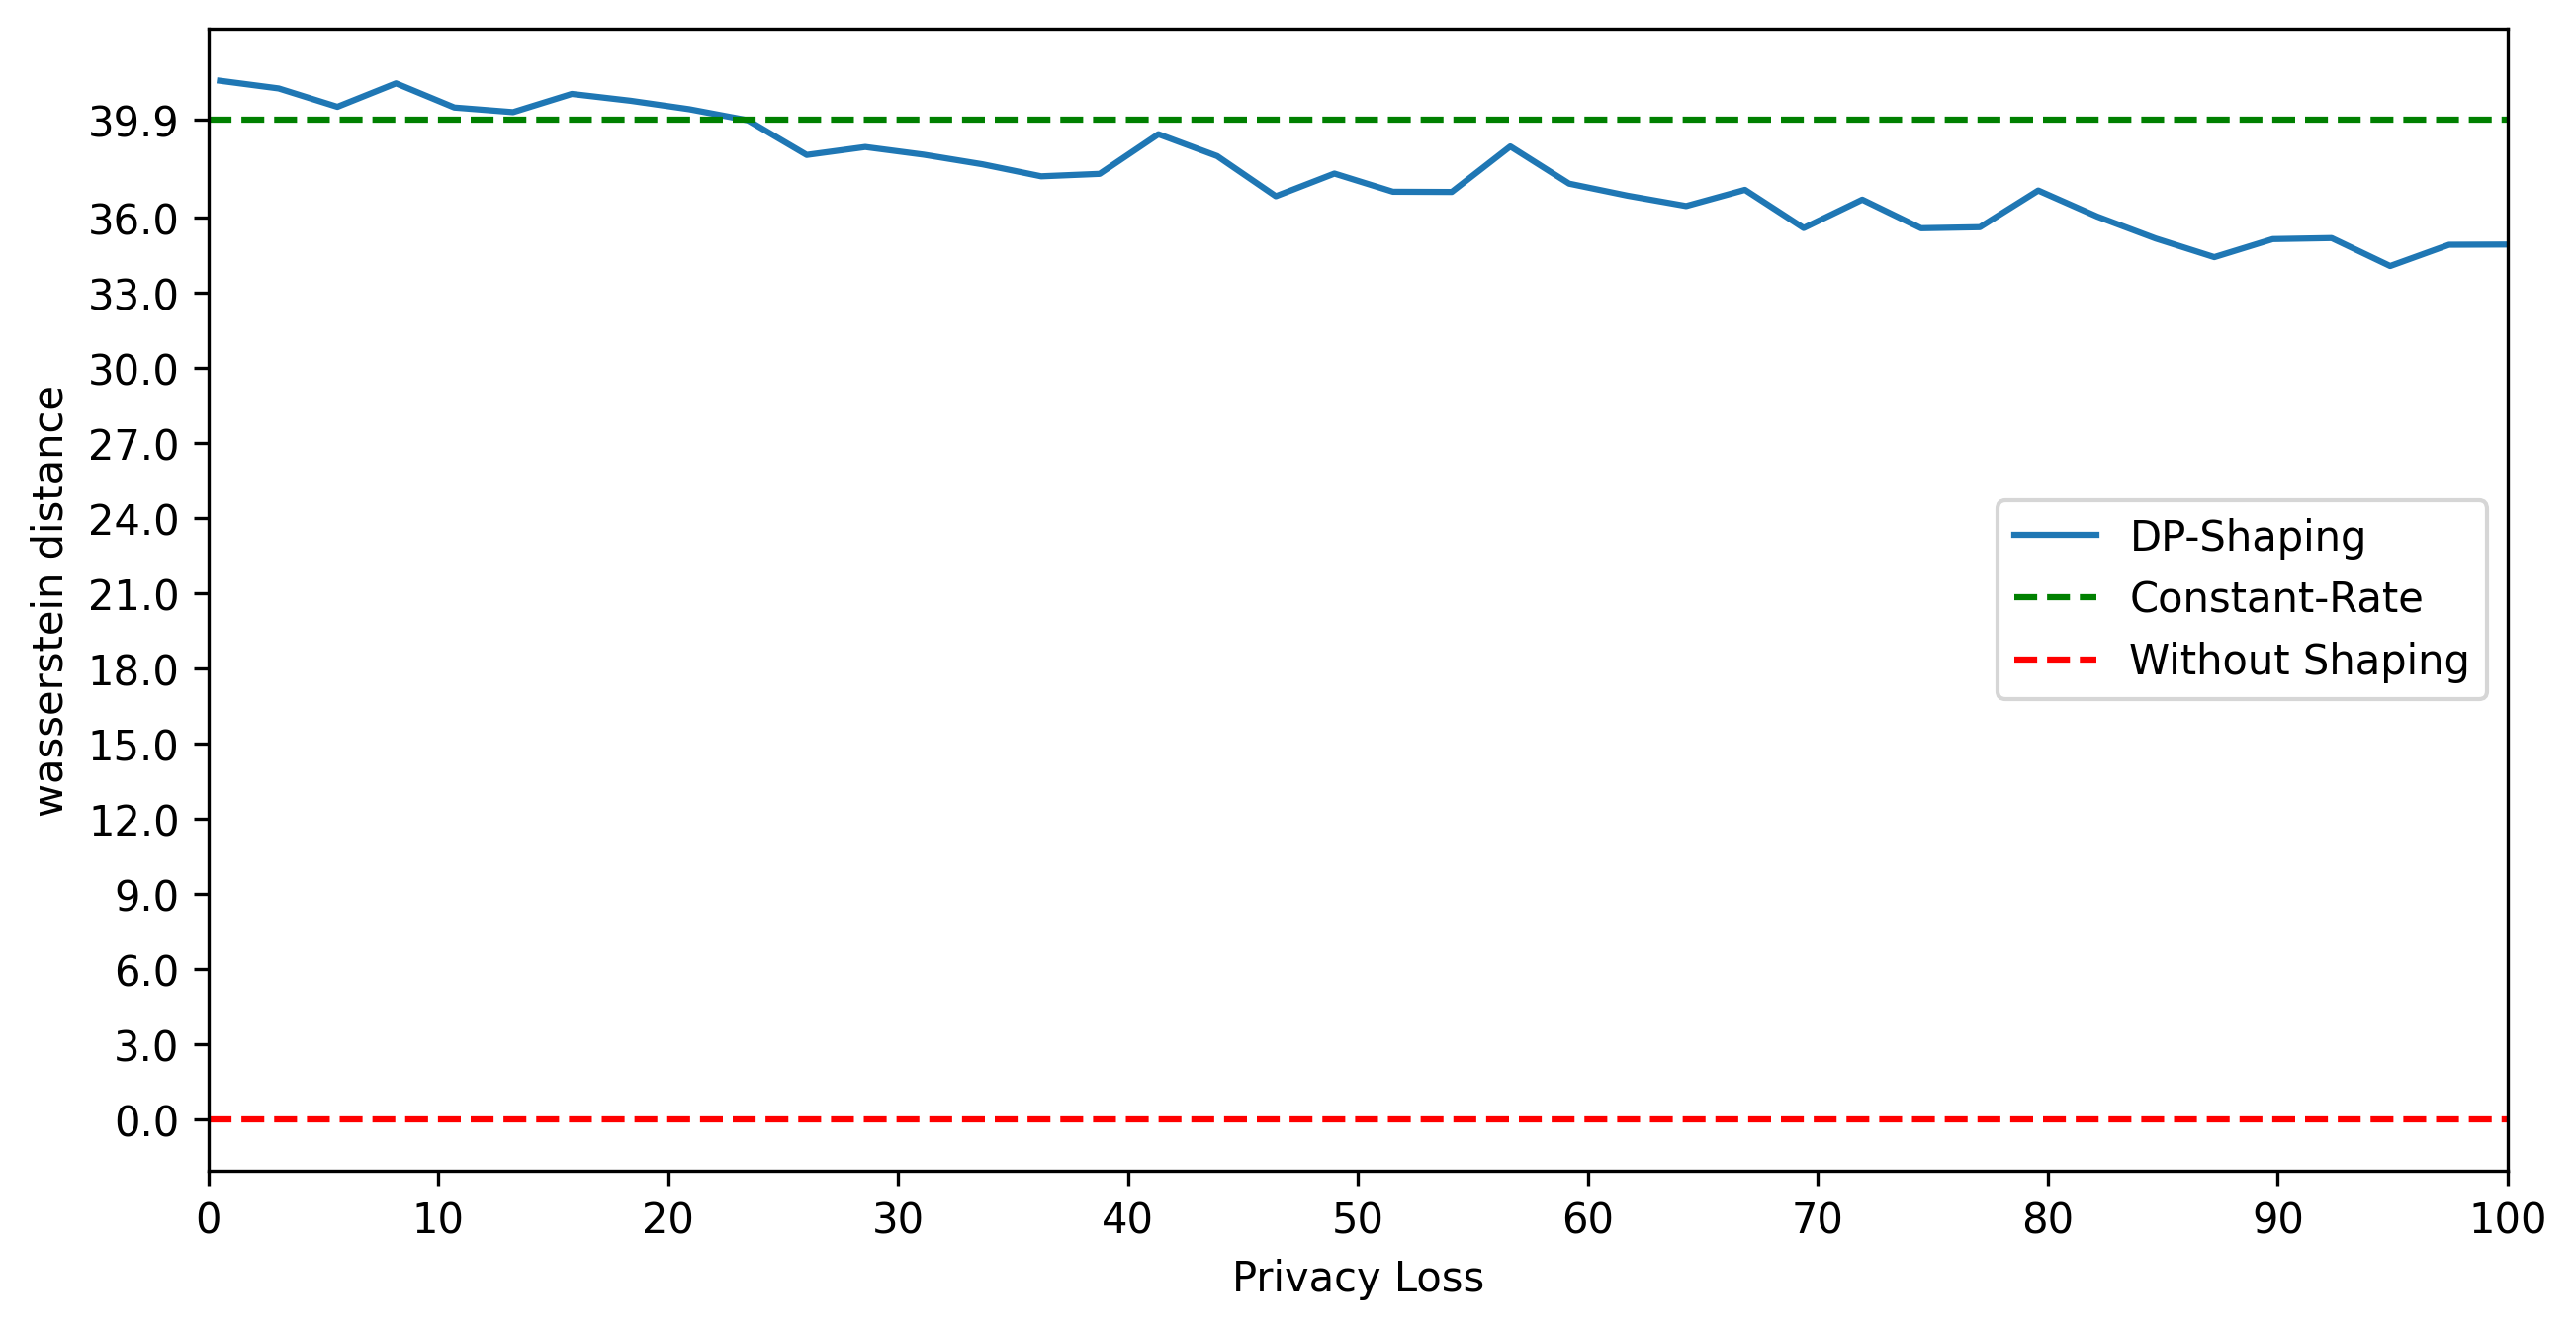

In [3]:
data_dir = '/home/ubuntu/results/privacy_loss_VS_overhead_(2023-02-27_22-43)/results.pkl'
data = pickle.load(open(data_dir, 'rb'))
print(data['average_aggregated_overhead'])
aao = data['average_aggregated_overhead']
ano = data['average_norm_distance']
awd = data['average_wasserstein_distance']
privacy_loss = data['privacy_loss']
plt.figure(dpi=300, figsize=(10,5))
plt.plot(privacy_loss,awd, label='DP-Shaping')
plt.plot([0, 100], [39.89, 39.89], 'g--', label='Constant-Rate')
plt.plot([0, 100], [0, 0], 'r--', label='Without Shaping')
plt.xticks([0] + list(np.arange(10, 100+1, 10.0)))
plt.yticks(list(np.arange(0, 39, 3)) + [39.89])
plt.xlim(0, 100)
plt.xlabel('Privacy Loss')
plt.ylabel('wasserstein distance')
plt.legend()

## BandB VS TCN (No shaping)

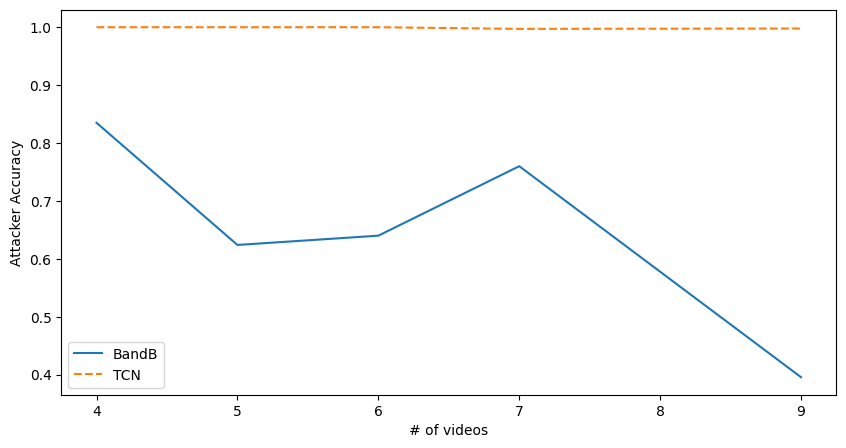

In [5]:
data_dir = '/home/ubuntu/results/BandB_vs_TCN_(2023-03-20_19-43)/baseline_results.pkl'
data = pickle.load(open(data_dir, 'rb'))
BandB_acc = data['BandB_accuracy']
BandB_acc_avg = np.mean(BandB_acc, axis=1)
BandB_acc_std = np.std(BandB_acc, axis=1)
TCN_acc = data['TCN_accuracy']
TCN_acc_avg = np.mean(TCN_acc, axis=1)
TCN_acc_std = np.std(TCN_acc, axis=1)
class_num = data['classes_num']
plt.figure(dpi=100, figsize=(10,5))
plt.plot(class_num, BandB_acc_avg,label='BandB')
plt.plot(class_num, TCN_acc_avg, '--', label='TCN')
plt.xlabel('# of videos')
plt.ylabel('Attacker Accuracy')
plt.legend()

## BandB VS TCN (Shaping)

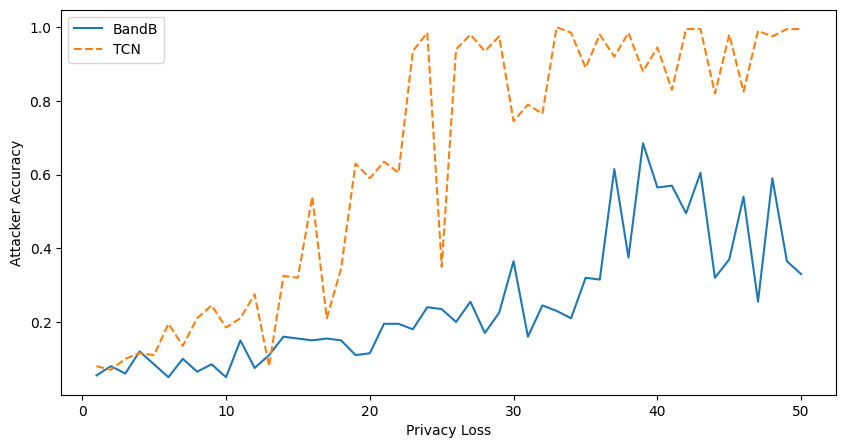

In [5]:
data_dir = '/home/ubuntu/results/BandB_vs_TCN_(2023-03-07_22-07)/results.pkl'
data = pickle.load(open(data_dir, 'rb'))
BandB_acc = data['BandB_accuracy']
TCN_acc = data['TCN_accuracy']
privacy_loss = data['privacy_loss']
plt.figure(dpi=100, figsize=(10,5))
plt.plot(privacy_loss, BandB_acc,label='BandB')
plt.plot(privacy_loss, TCN_acc, '--', label='TCN')
plt.xlabel('Privacy Loss')
plt.ylabel('Attacker Accuracy')
plt.legend()

## BandB VS TCN (Shaping) mean-var

Text(0.5, 1.0, 'BandB model')

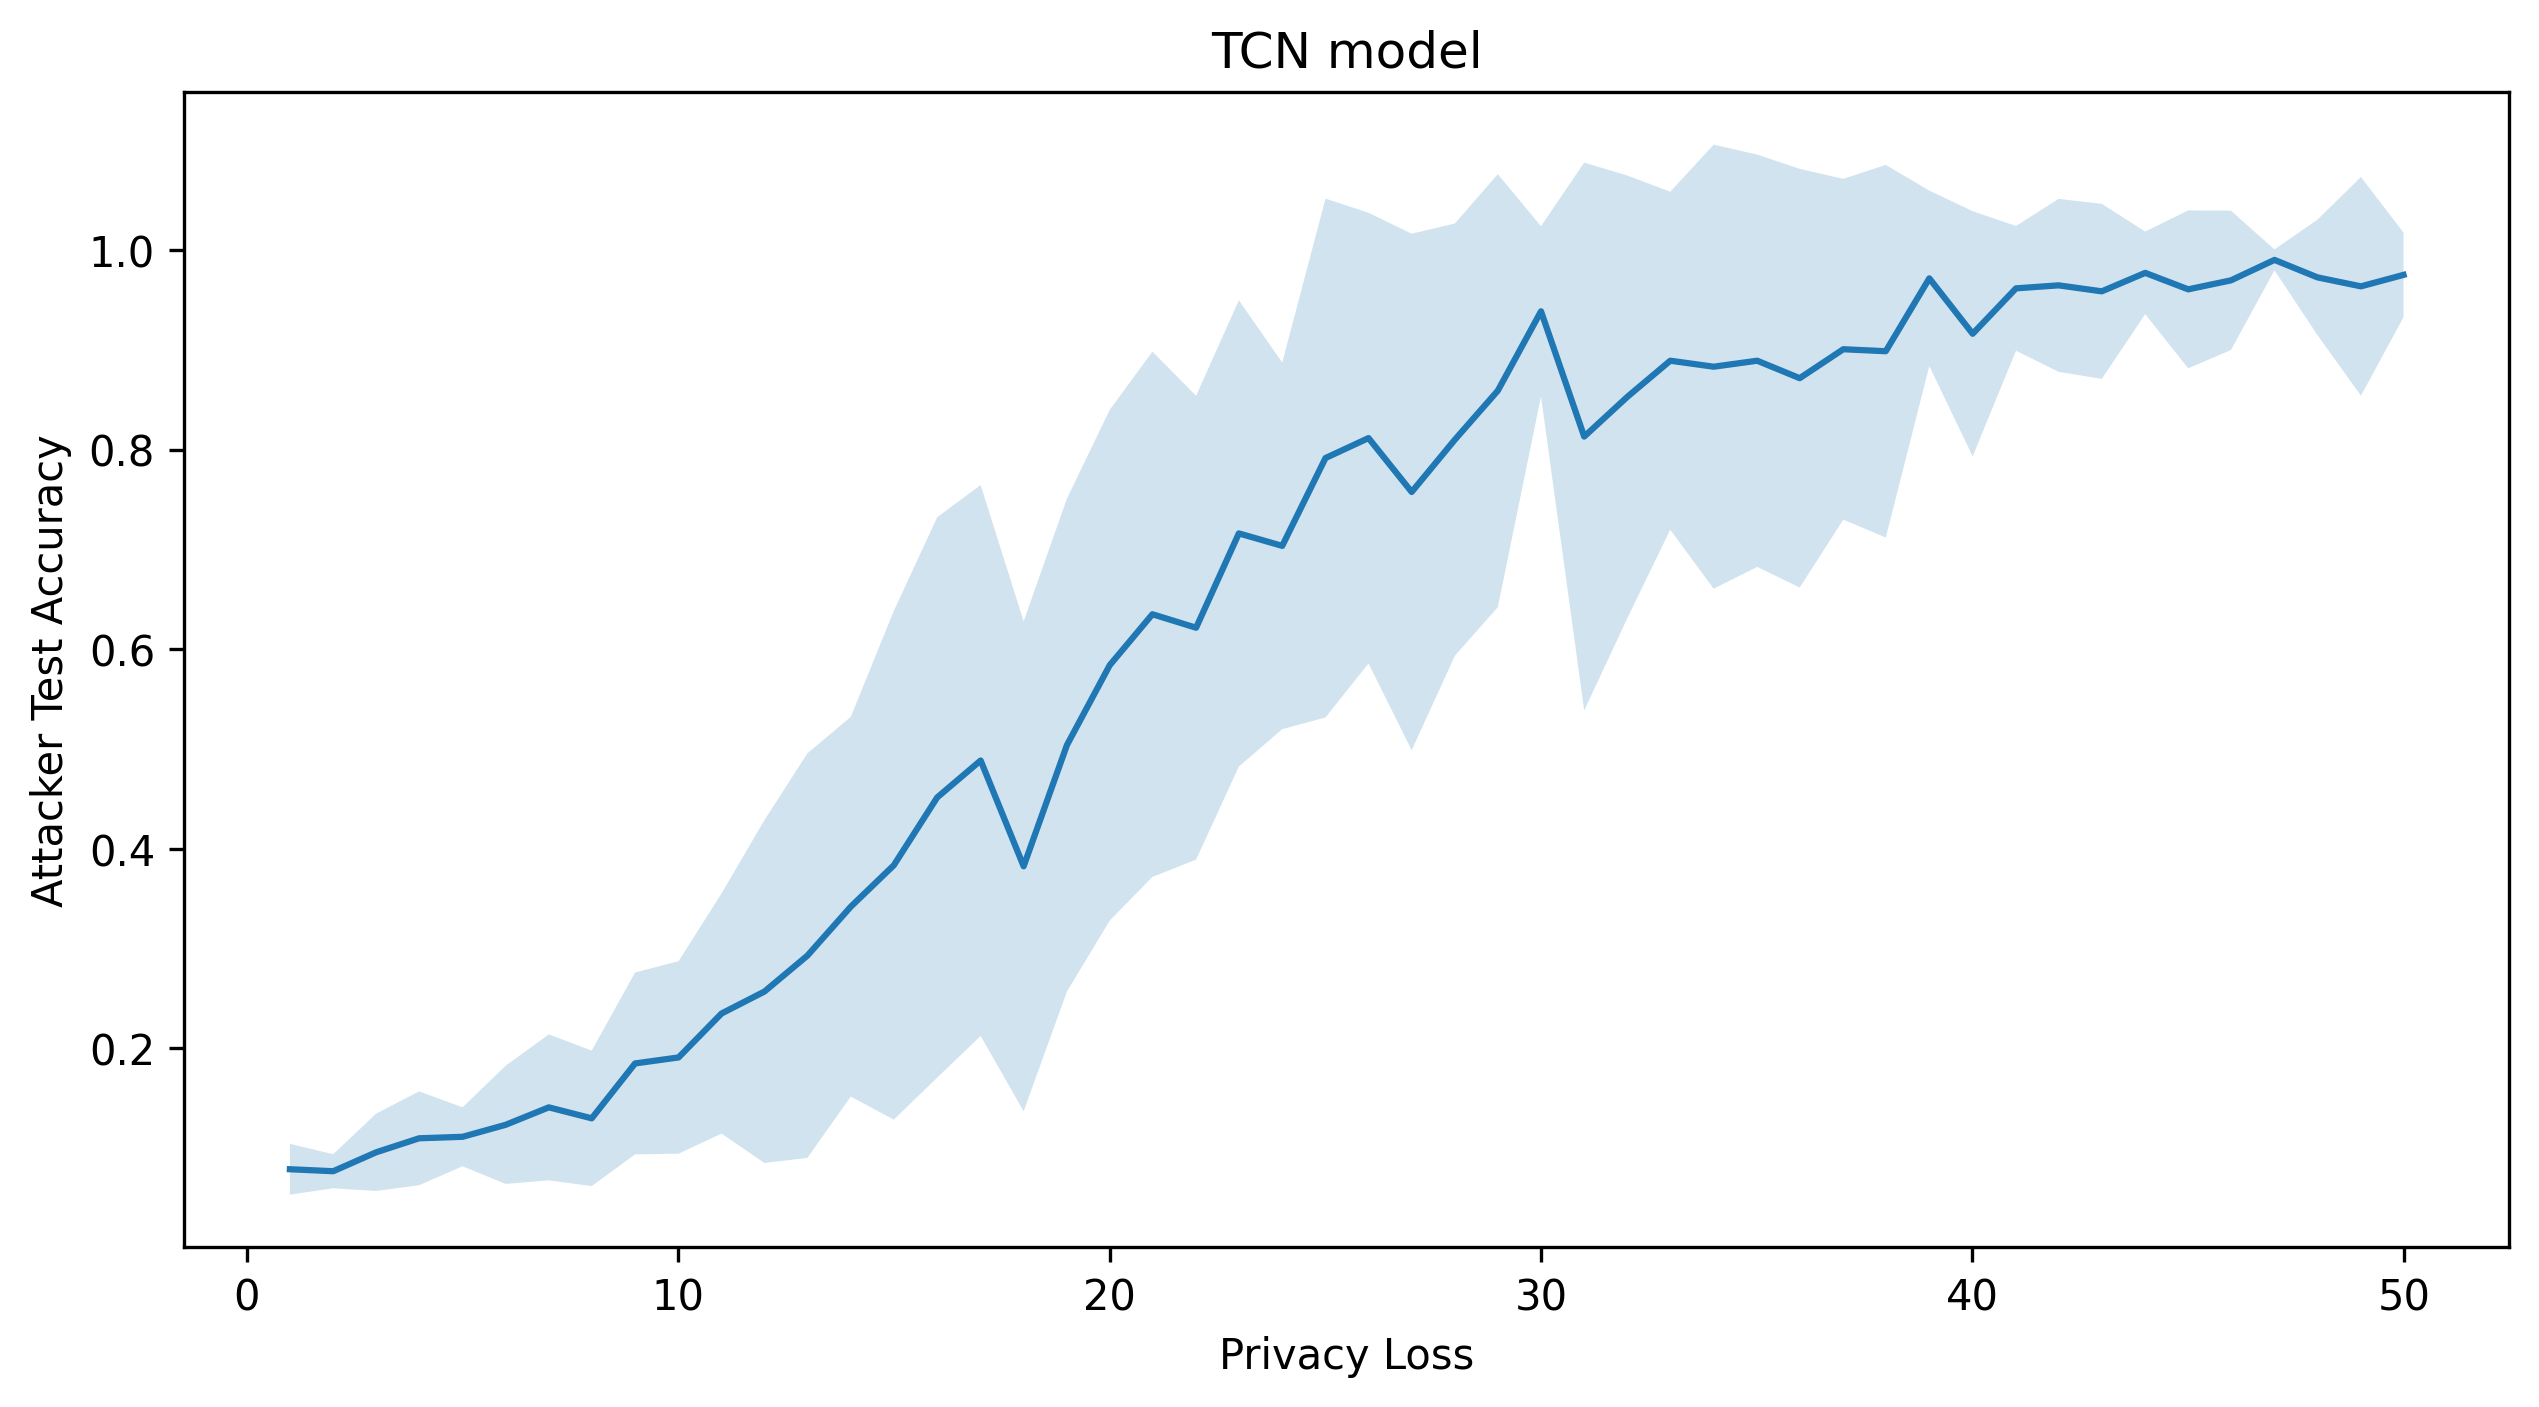

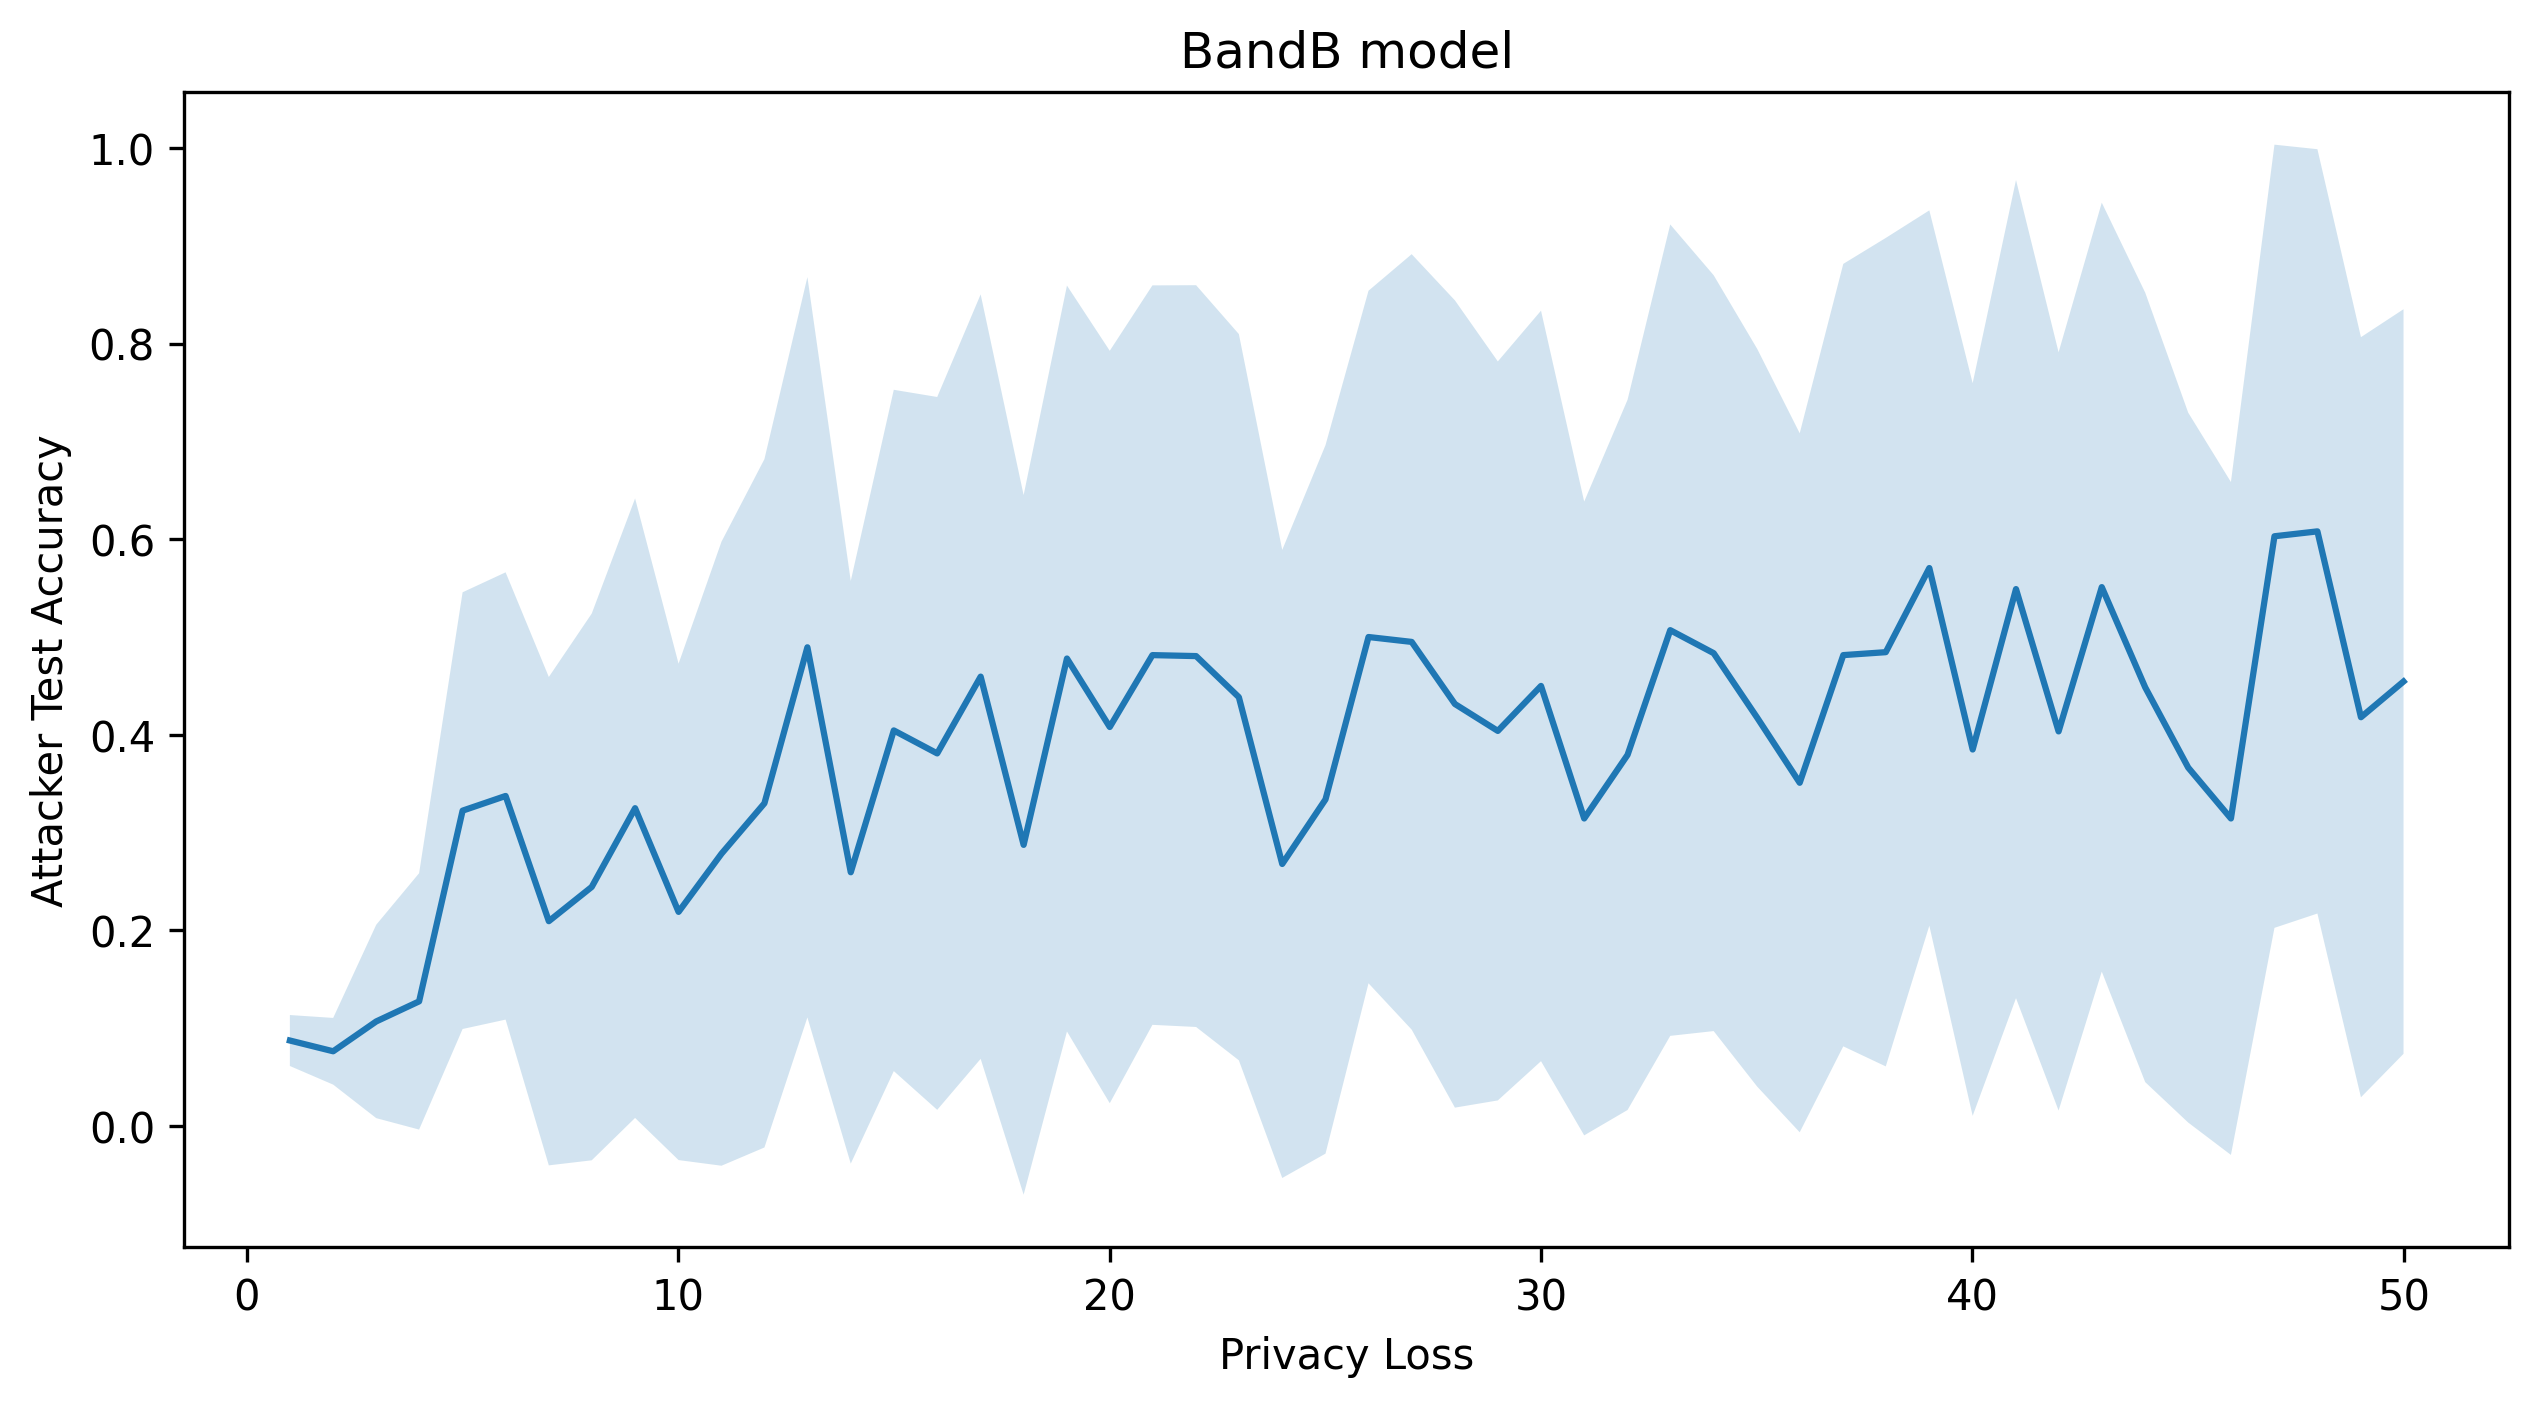

In [13]:
data_dir = '/home/ubuntu/results/BandB_vs_TCN_(2023-03-14_14-11)/results.pkl'
data = pickle.load(open(data_dir, 'rb'))
BandB_acc = np.array(data['BandB_accuracy'])
# BandB_min_acc = np.min(BandB_acc, axis=1)
# BandB_max_acc = np.max(BandB_acc, axis=1)
BandB_avg_acc = np.mean(BandB_acc, axis=1)
BandB_std_acc = np.std(BandB_acc, axis=1)
privacy_loss = data['privacy_loss']

TCN_acc = data['TCN_accuracy']
# TCN_min_acc = np.min(TCN_acc, axis=1)
# TCN_max_acc = np.max(TCN_acc, axis=1)
TCN_avg_acc = np.mean(TCN_acc, axis=1)
TCN_std_acc = np.std(TCN_acc, axis=1)

fig, ax = plt.subplots(dpi=300, figsize=(10, 5))
ax.plot(privacy_loss, TCN_avg_acc,label='BandB_avg')
ax.fill_between(privacy_loss, TCN_avg_acc - TCN_std_acc, TCN_avg_acc + TCN_std_acc, alpha=0.2)
ax.set_xlabel("Privacy Loss")
ax.set_ylabel("Attacker Test Accuracy")
ax.set_title("TCN model")

fig, ax = plt.subplots(dpi=300, figsize=(10, 5))
ax.plot(privacy_loss, BandB_avg_acc,label='BandB_avg')
ax.fill_between(privacy_loss, BandB_avg_acc - BandB_std_acc, BandB_avg_acc + BandB_std_acc, alpha=0.2)
ax.set_xlabel("Privacy Loss")
ax.set_ylabel("Attacker Test Accuracy")
ax.set_title("BandB model")





# privacy_loss = data['privacy_loss']
# plt.figure(dpi=100, figsize=(10,5))
# plt.plot(privacy_loss, BandB_avg_acc,label='BandB_avg')
# plt.plot(privacy_loss, BandB_max_acc,label='BandB_max')
# plt.plot(privacy_loss, BandB_min_acc,label='BandB_min')
# plt.plot(privacy_loss, TCN_acc, '--', label='TCN')
# plt.xlabel('Privacy Loss')
# plt.ylabel('Attacker Accuracy')
# plt.legend()